---  

 <img align="left" width="85" height="85"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Natural Language Processing</h1>


---
<h4><div align="right">Instructor: Dr M. Khurram Shehzad</div></h4>  

<h1 align="center">Sentiment Analysis of Comments of Youtube Video </h1>

<h4><div align="right">Submitted by: Anisa Rehman  </div></h4> 
<h4><div align="right">Roll No: msdsf21m518  </div></h4> 

## Contents

- **introduction**

- **Machine Learning**
- **Unigram features**                             
- **Bigram features**
- **Triigram features** 

- **Increased Negative Comments**
- **corpus**
- **Unigram features**
- **Bigram features**
- **Trigram features**
- **Tfidf Features** 

-  **summary**

### The Sentiment Analysis problem


> **Sentiment analysis is the process of understanding the opinion of an author about a
subject**

- Movies reviews
- Amazon product reviews
- Twitter airline sentiment


## Build new features from text


When we have a sentiment analysis task,to solve with machine learning, having extra features usually results in a better model.


some features say something about the complexity of the text column can be explored

> - How long is each sentence? (*review)
> - how many sentences does it contain?
> - What part of speech are involved?
> - How many punctuation marks?
> - how many positive  or negative sentences?
> - parts of speech involved
> - punctuation marks


In [162]:
# importing libraries

In [36]:
import pandas as pd
import numpy as np

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
import contractions
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 

In [37]:
 #Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics  


In [1]:
# importing data

In [38]:
dataset = pd.read_excel('sentences2_labeled.xlsx')

In [6]:
# positive and negative sentences

In [5]:
print('Number of positive and negative reviews: ', dataset.labels.value_counts())

Number of positive and negative reviews:  1    127
0     73
Name: labels, dtype: int64


In [7]:
#Longest and shortest reviews

In [10]:
length_sen = dataset.comments.str.len()

# How long is the longest review
print(max(length_sen))

print(min(length_sen))

469
8


## wordcloud

> A word cloud is an image composed of words with different sizes and colors. They can be especially useful in sentiment analysis.

> Word cloudsare used across different  contexts. In the most common type of word clouds - and the one we will be using in this course - the size of the text corresponds to the frequency of the word. The more frequent a word is, the bigger and bolder it will appear on the word cloud.

**It contains stopwords,**

In [37]:
with open('com.txt', 'w' ,encoding="utf-8") as f:
    f.writelines(dataset.comments)

In [38]:
com_list = open('com.txt', 'r+' , encoding= "utf-8")

In [39]:
text = com_list.readline()

In [40]:
tokens =text.split(' ')

In [57]:
### WORDCLOUD

In [29]:
cc = WordCloud(background_color="black").generate(str(tokens))

In [31]:
plt.show()

(-0.5, 399.5, 199.5, -0.5)

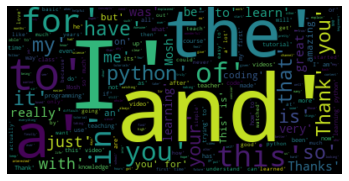

In [33]:
plt.imshow(cc, interpolation='bilinear') 
plt.axis("off")

As Stopwords are more frequent, so the real topic of discussion is suppressed.

### removing stopwords

In [42]:
# creating an empty list
expanded_words = []   
for word in tokens:
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))

In [41]:
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

In [45]:
tokens_without_stopwords = [word for word in tokens if not word in ENGLISH_STOP_WORDS]

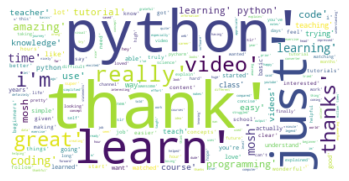

In [46]:
my_cloud = WordCloud(background_color='white', stopwords=ENGLISH_STOP_WORDS).generate(str(tokens_without_stopwords))

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

Here it shows that most people are commenting about python, and complementing with thanks, hence they liked the video.

<h1 align="center">Machine Learning </h1>

#### corpus

In [4]:
dataset = pd.read_excel('sentences2_labeled.xlsx')

In [3]:
dataset.shape

(200, 3)

In [5]:
dataset.head()

,index,comments,labels
0,1,Is this coding for creating website or applic...,1
1,2,"Awesome job, Mosh!!Learning for the data scie...",1
2,3,I watched your SQL course and it was amazing,1
3,4,Thank you for being so clear and concise with...,1
4,5,"Most YouTube instructors, or instructors in g...",1


#### How many positive and negative reviews

Data Preprocessing

In [39]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to C:\Users\UNEESA
[nltk_data]     REHMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
corpus=[]

for i in range(0, 200):
  review = re.sub('[^a-zA-Z]', ' ', dataset['comments'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [41]:
corpus

['code creat websit applic program newbi say simplifi python point wholli interest',
 'awesom job mosh learn data scienc realm',
 'watch sql cours amaz',
 'thank clear concis explan',
 'youtub instructor instructor gener share someth certain way',
 'feel job readi watch video',
 'thank awesom',
 'hi mosh thank much video curiou python super interest learn use mani field especi chosen degre',
 'actual watch video could bit knowledg futur sinc python quit use mani area also job posit aim futur graduat',
 'thank make certainli help lot peopl includ',
 'hey mosh mathematician final interest world also discov video truli motiv learn python',
 'watch whole thing',
 'state beginn easi follow flow nice cover mani topic within hour',
 'excel work',
 'thank mosh amaz materi',
 'pleas question use unit',
 'upper solut third exercis superl instruct teach concept demonstr',
 'includ error stroke geniu nuanc program languag difficult understand first show thing go wrong also show correct mistak',
 '

### Data Transformation

In [42]:
cv = CountVectorizer(max_features = 100)

In [43]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

### Dividing dataset into training and test set

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<h1 align="center">1 </h1>

#### Model fitting (Naive Bayes)

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Model performance


In [56]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[20  3]
 [ 8  9]]


0.725

<h1 align="center">2 </h1>

### Logistic Model 

In [73]:
vect = CountVectorizer(max_features=None)
vect_fit = vect.fit(dataset.comments)

In [74]:
# Create the bow representation
bow = vect_fit.transform(dataset.comments)

# Print the bag-of-words result 
print(bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
X_df = pd.DataFrame(bow.toarray(), columns=vect.get_feature_names())

In [76]:
X_df

,able,about,academic,active,actually,adhd,adventure,advice,after,again,...,yearim,years,yesterday,yet,you,your,yours,youtube,youuuuuu,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
sentiments = dataset.labels 

In [80]:
sentiments

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: labels, Length: 200, dtype: int64

In [81]:
X_df.insert(0 , 'labels' , sentiments)

In [82]:
X_df

,labels,able,about,academic,active,actually,adhd,adventure,advice,after,...,yearim,years,yesterday,yet,you,your,yours,youtube,youuuuuu,zero
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

The label column stores the sentiment, which is 1 when the review is positive, and 0 when negative. The text review has been transformed, using BOW, to numeric columns.

In [85]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# Define the vector of targets and matrix of features
y = X_df.labels
X = X_df.drop('labels', axis=1)

In [86]:
# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.985


In [88]:
# Define the vector of labels and matrix of features
y = X_df.labels
X = X_df.drop('labels', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.98125
Accuracy on test set:  0.7


In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)
 
# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))


Accuracy score test set:  0.6833333333333333
Confusion matrix test set: 
 [[0.08333333 0.28333333]
 [0.03333333 0.6       ]]


In [90]:
# Import the accuracy and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the labels 
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))


Accuracy score of test data:  0.6666666666666666
Confusion matrix of test data: 
 [[0.16666667 0.18333333]
 [0.15       0.5       ]]


<h1 align="center">3 </h1>

## Decsion Tree

In [105]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier    
# Import Decision Tree Classifier
from sklearn.model_selection import train_test_split      
# Import train_test_split function
from sklearn import metrics   
#Import scikit-learn metrics module for accuracy calculation

In [106]:
#split dataset in features and target variable
y = X_df.labels
X = X_df.drop('labels', axis=1)

In [107]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# 70% training and 30% test


In [108]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [109]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5166666666666667


In [110]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5833333333333334


<h1 align="center">4 </h1>

### SVM

In [111]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
testPredictionsSVM = svm.predict(X_test)

#### performance

In [112]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVM, average='macro'))

Macro: (0.5539152759948652, 0.5486111111111112, 0.546964663243733, None)


<h1 align="center">Unigrams </h1>

In [4]:
X = np.array(dataset['comments'])
y = np.array(dataset['labels'])

In [113]:
# spliiting test and train datasets

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(1,1)).fit(X)
X_train_vectorized = countVector.transform(X_train).toarray() #feature matrix is generated
X_test_vectorized = countVector.transform(X_test).toarray()

### Naive Bayes Model with Unigram Features

In [96]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_vectorized, y_train)
testPredictionsnaivebayes = naivebayes.predict(X_test_vectorized)

In [103]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayes, average='macro'))

Macro: (0.6777493606138107, 0.698005698005698, 0.6799999999999999, None)


### SVM model with Unigram

In [99]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)
testPredictionsSVM = svm.predict(X_test_vectorized)

In [102]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVM, average='macro'))

Macro: (0.5770609318996416, 0.5612535612535612, 0.5611285266457681, None)


### Decison Tree

In [134]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_vectorized,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_vectorized)


In [135]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7


<h3 align="center">Bigram Features </h3>

In [136]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(2,2)).fit(X)
X_train_bigram = countVector.transform(X_train).toarray() #feature matrix is generated
X_test_bigram = countVector.transform(X_test).toarray()

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### SVM

In [138]:
svm = SVC(kernel='linear')
svm.fit(X_train_bigram, y_train)
testPredictionsSVMBigram = svm.predict(X_test_bigram)

In [ ]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVM, average='macro'))

#### Naive Bayes

In [143]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_bigram, y_train)
testPredictionsnaivebayesbigram = naivebayes.predict(X_test_bigram)

In [145]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayes, average='macro'))

Macro: (0.48721227621483376, 0.48333333333333334, 0.46890286512928026, None)


###  Decision Tree

In [146]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_bigram,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_bigram)


In [147]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.325


<h3 align="center">Trigram Features </h3>

In [148]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(3,3)).fit(X)
X_train_trigram = countVector.transform(X_train).toarray() #feature matrix is generated
X_test_trigram = countVector.transform(X_test).toarray()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### SVM

In [153]:
svm = SVC(kernel='linear')
svm.fit(X_train_trigram, y_train)
testPredictionsSVMTrigram = svm.predict(X_test_trigram)

In [ ]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMTrigram, average='macro')), binary=True

### Naive Bayes

In [150]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_trigram, y_train)
testPredictionsnaivebayestrigram = naivebayes.predict(X_test_trigram)

In [151]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayestrigram, average='macro'))

Macro: (0.5250783699059561, 0.5208333333333334, 0.4666666666666667, None)


### Decison Tree

In [155]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_trigram,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_trigram)


In [156]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6


## TFIDF 

In [3]:
X = np.array(dataset['comments'])
y = np.array(dataset['labels'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
vectorizer = TfidfVectorizer(max_features=250)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.fit_transform(X_test).toarray()

## Naive Bayes Model

In [32]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_tfidf, y_train)
testPredictionsnaivebayestfidf = naivebayes.predict(X_test_tfidf)

In [33]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayestfidf, average='macro'))

Macro: (0.5, 0.5, 0.4949494949494949, None)


## SVM

In [34]:
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
testPredictionsSVMTfidf = svm.predict(X_test_tfidf)

In [35]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMTfidf, average='macro'))

Macro: (0.6125319693094629, 0.6145833333333333, 0.6131528046421664, None)




# Increasing number of negative comments to check results

>  here 30 negative sentences are added, to make the difference between positive and negative setences less

In [45]:
### loading new dataset

In [47]:
dataset = pd.read_excel('sentences_balanced.xlsx')

In [48]:
print('Number of positive and negative reviews: ', dataset.labels.value_counts())

Number of positive and negative reviews:  1    127
0    103
Name: labels, dtype: int64


## Generating corpus

In [49]:
nltk.download('stopwords')

ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to C:\Users\UNEESA
[nltk_data]     REHMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
corpus=[]

for i in range(0, 230):
  review = re.sub('[^a-zA-Z]', ' ', dataset['comments'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [51]:
corpus

['code creat websit applic program newbi say simplifi python point wholli interest',
 'awesom job mosh learn data scienc realm',
 'watch sql cours amaz',
 'thank clear concis explan',
 'youtub instructor instructor gener share someth certain way',
 'feel job readi watch video',
 'thank awesom',
 'hi mosh thank much video curiou python super interest learn use mani field especi chosen degre',
 'actual watch video could bit knowledg futur sinc python quit use mani area also job posit aim futur graduat',
 'thank make certainli help lot peopl includ',
 'hey mosh mathematician final interest world also discov video truli motiv learn python',
 'watch whole thing',
 'state beginn easi follow flow nice cover mani topic within hour',
 'excel work',
 'thank mosh amaz materi',
 'pleas question use unit',
 'upper solut third exercis superl instruct teach concept demonstr',
 'includ error stroke geniu nuanc program languag difficult understand first show thing go wrong also show correct mistak',
 '

In [52]:
cv = CountVectorizer(max_features = 100)

X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Naive Bayes model

In [54]:
#### guassian 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[23  2]
 [10 11]]


0.7391304347826086

In [56]:
vect = CountVectorizer(max_features=None)
vect_fit = vect.fit(corpus)

# Create the bow representation
bow = vect_fit.transform(corpus)

# Print the bag-of-words result 
print(bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
X_df = pd.DataFrame(bow.toarray(), columns=vect.get_feature_names())

sentiments = dataset.labels
X_df.insert(0 , 'labels' , sentiments)

In [59]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# Define the vector of targets and matrix of features
y = X_df.labels
X = X_df.drop('labels', axis=1)


## accuracy

In [60]:
# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.9869565217391304


## Decision Tree Classifies

In [61]:
#split dataset in features and target variable
y = X_df.labels
X = X_df.drop('labels', axis=1)

In [62]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [63]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6521739130434783


## SVM 

In [64]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
testPredictionsSVM = svm.predict(X_test)

In [65]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVM, average='macro'))

Macro: (0.7402597402597402, 0.6761904761904762, 0.6349206349206349, None)


## Generating unigram Features

In [66]:
X = np.array(dataset['comments'])
y = np.array(dataset['labels'])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(1,1)).fit(X)
X_train_vectorized = countVector.transform(X_train).toarray() #feature matrix is generated
X_test_vectorized = countVector.transform(X_test).toarray()

## Naive Bayes Model

In [69]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_vectorized, y_train)
testPredictionsnaivebayes = naivebayes.predict(X_test_vectorized)

In [70]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayes, average='macro'))

Macro: (0.6145833333333333, 0.6072124756335282, 0.6080200501253132, None)


## SVM

In [71]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)
testPredictionsSVM = svm.predict(X_test_vectorized)

In [72]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVM, average='macro'))

Macro: (0.7165178571428572, 0.6890838206627681, 0.6928608115048793, None)


## Decision Tree

In [73]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_vectorized,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_vectorized)


In [74]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.717391304347826


## Generating Bigram Features

In [75]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(2,2)).fit(X)
X_train_vectorized = countVector.transform(X_train).toarray() #feature matrix is generated
X_test_vectorized = countVector.transform(X_test).toarray()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## SVM

In [77]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)
testPredictionsSVMBigram = svm.predict(X_test_vectorized)

In [78]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMBigram, average='macro'))

Macro: (0.4731182795698925, 0.4746450304259635, 0.47291666666666665, None)


## Naive Bayes

In [79]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_vectorized, y_train)
testPredictionsnaivebayes = naivebayes.predict(X_test_vectorized)

In [80]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayes, average='macro'))

Macro: (0.5494505494505495, 0.5273833671399595, 0.4067460317460318, None)


## Generating Trigram Features

In [81]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(3,3)).fit(X)
X_train_vectorized = countVector.transform(X_train).toarray() #feature matrix is generated
X_test_vectorized = countVector.transform(X_test).toarray()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## SVM

In [83]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)
testPredictionsSVMBigram = svm.predict(X_test_vectorized)

In [84]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMBigram, average='macro'))

Macro: (0.5113636363636364, 0.5018939393939394, 0.37990196078431376, None)


## Naive Bayes

In [85]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_vectorized, y_train)
testPredictionsnaivebayes = naivebayes.predict(X_test_vectorized)

In [86]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayes, average='macro'))

Macro: (0.3161764705882353, 0.35795454545454547, 0.31547619047619047, None)


# Generating Tfidf features

In [87]:
X = np.array(dataset['comments'])
y = np.array(dataset['labels'])

In [89]:
vectorizer = TfidfVectorizer(max_features=200)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.fit_transform(X_test).toarray()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Naive Bayes Model

In [91]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_tfidf, y_train)
testPredictionsnaivebayestfidf = naivebayes.predict(X_test_tfidf)

In [92]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayestfidf, average='macro'))

Macro: (0.5, 0.5, 0.4940219990435199, None)


## SVM

In [93]:
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
testPredictionsSVMTfidf = svm.predict(X_test_tfidf)

In [94]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMTfidf, average='macro'))

Macro: (0.5479166666666666, 0.5434782608695652, 0.532656023222061, None)


# Summary

>  -  logistic regression performend best with almost 70% accuracy on test dataset.
>            - Naive Bayes accuracy is 70 % accurate
>            - SVM and Decision Tree performance is upto 55% accurate
   

>    -  with unigram features 
>               - Decision tree gave 70% performance accuracy
>               - Naive Bayes gave 67% performance accuracy
>               - SVG performance is 57% accurate

>    -  with bigram features 
>               - Decision tree gave 48% performance accuracy
>               - Naive Bayes gave 32% performance accuracy

>    -  with trigram features 
>               - Decision tree gave 60% performance  accurate
>               - Naive Bayes gave 51% performance accurate

>    -  with tfidf features 
>               - SVM 61% performance  accurate
>               - Naive Bayes gave 51% performance accurat0

## **Increased negative comments**

>    -  with corpus 
>               - SVM 74% performance  accurate
>               - Naive Bayes gave 73% performance accurat
>               - logistic model gave almost 90% accuracy
>               - Decision tree gave 65% accurate result

>    -  with unigram features 
>               - Decision tree gave 71% performance accuracy
>               - Naive Bayes gave 61% performance accuracy
>               - SVM performance is 71% accurate

>    -  with bigram features 
>               - Naive Bayes gave 54% performance accuracy
>               - SVM performance is 47% accurate

>    -  with trigram features 
>               - Naive Bayes gave 31% performance accuracy
>               - SVM performance is 51% accurate

>    -  with tfidf features 
>               - SVM 54% performance  accurate
>               - Naive Bayes gave 50% performance accurat